In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Clean_Dataset.csv') # Dataset from kaggle
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [93]:
# Drop unnecessary columns
# - **Unnamed: 0**: This column appears to be an artifact of indexing and can be safely removed.
# - **flight**: Since the flight numbers are specific identifiers and are not expected to influence the prediction, we will drop this column as well.
df = df.drop(columns=['Unnamed: 0', 'flight'])

In [94]:
# Checking for Missing Values
df.isnull().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [95]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


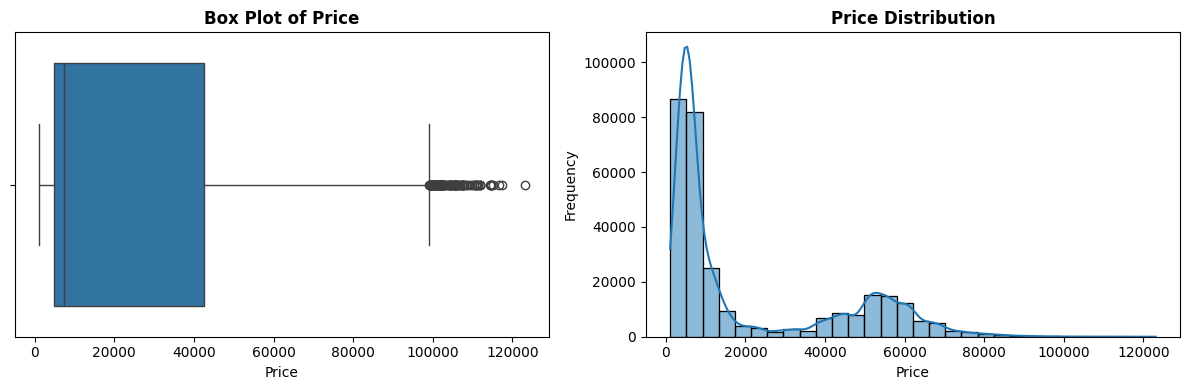

In [96]:

# Exploring the Distribution and Outliers of Prices

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Box plot for the 'price' column 
box_plot = sns.boxplot(x=df['price'], ax=axes[0])
axes[0].set_title('Box Plot of Price', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Price', fontsize=10)
axes[0].grid(False)

# Histogram for the 'price' column 
sns.histplot(df['price'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Price Distribution', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Price', fontsize=10)
axes[1].set_ylabel('Frequency', fontsize=10)
axes[1].grid(False)


plt.tight_layout()
plt.show()



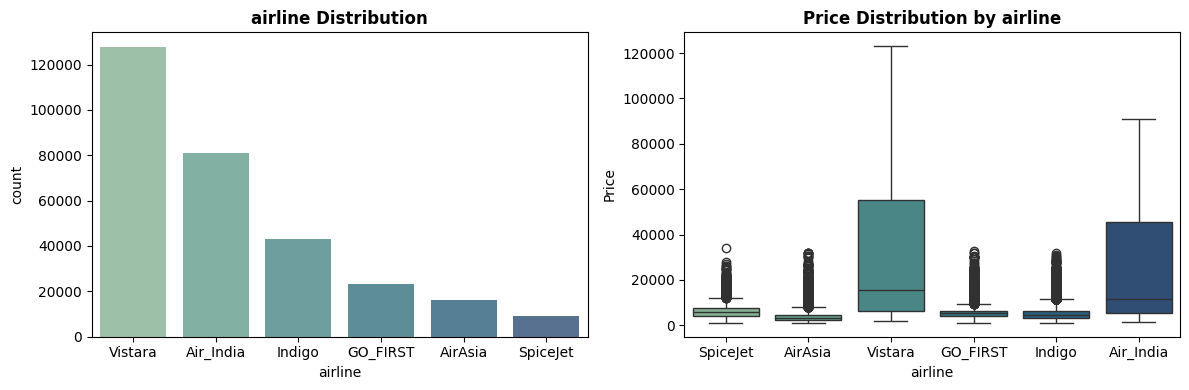

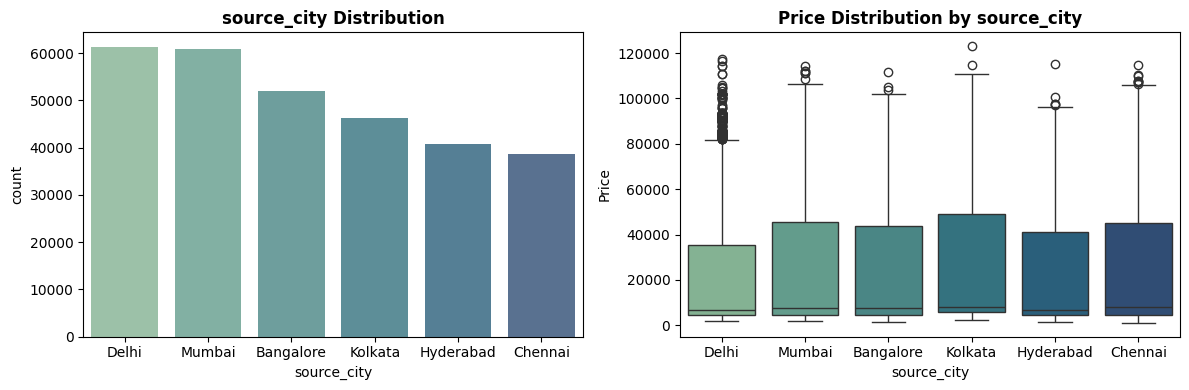

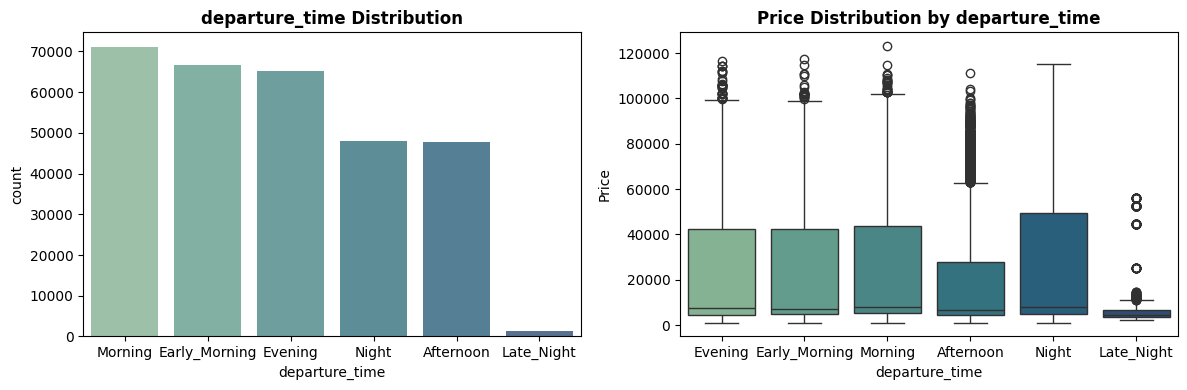

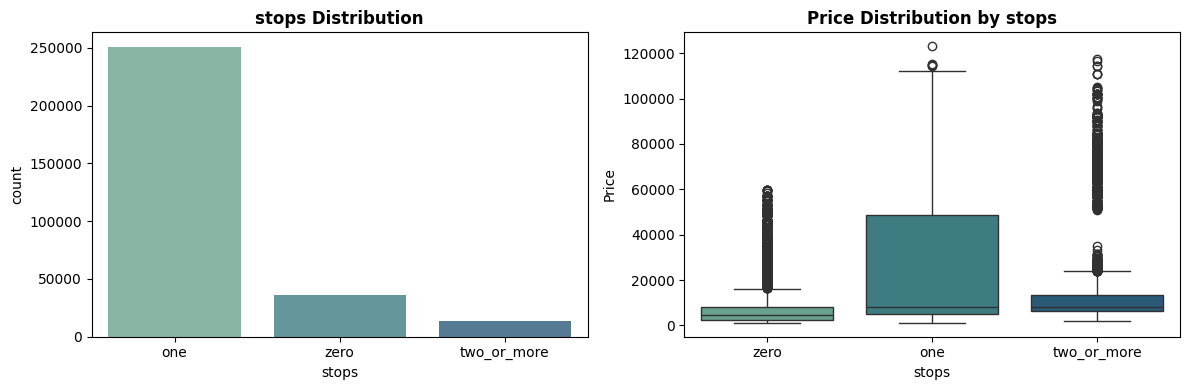

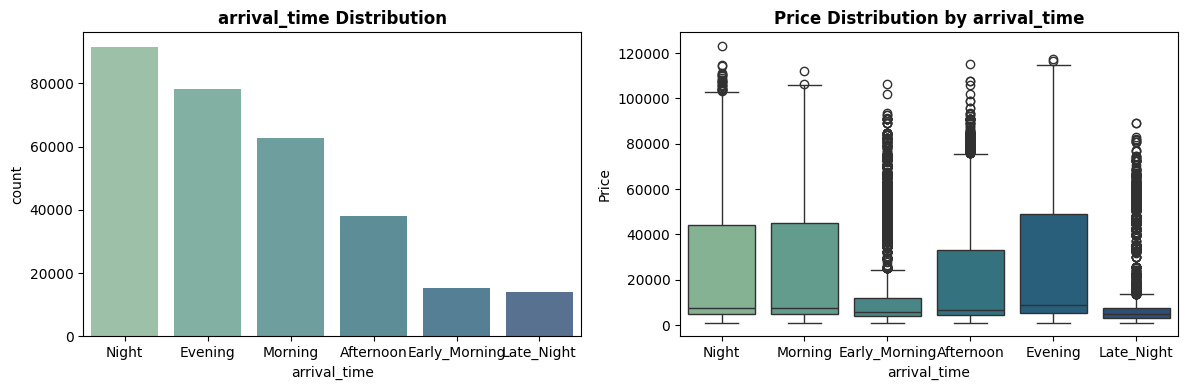

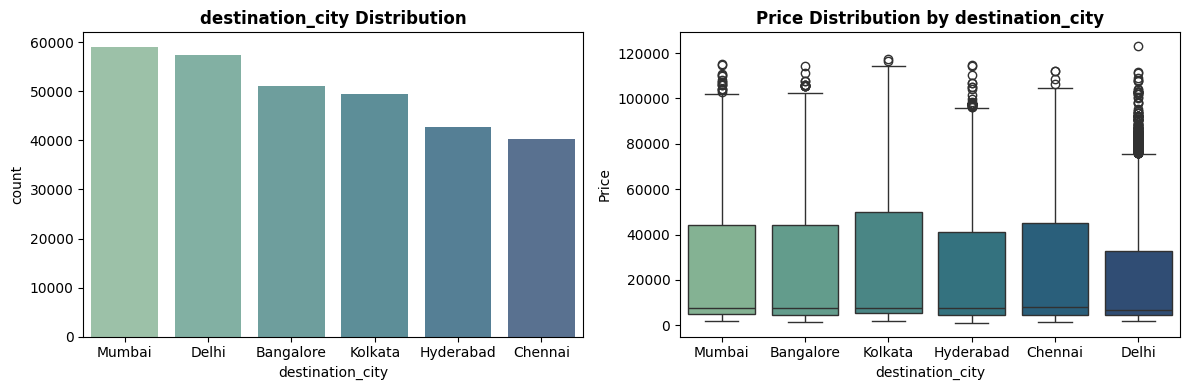

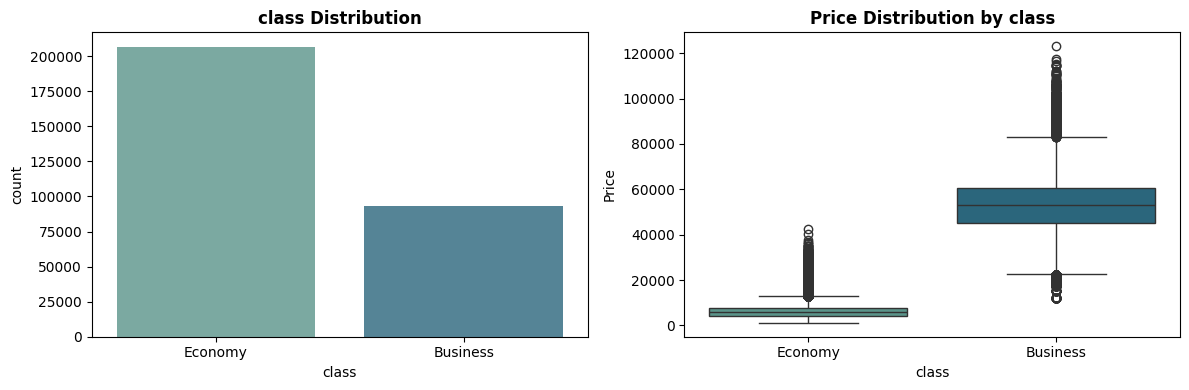

In [97]:
def plot_distributions(df, column):
    blue_palette = sns.color_palette("crest", n_colors=len(df[column].unique()))

    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    count_df = df[column].value_counts().reset_index()
    count_df.columns = [column, 'count']

    # Plot the bar plot for value counts of the column
    sns.barplot(x=column, 
                y='count', 
                data=count_df,
                hue=column, 
                alpha=0.8, 
                palette=blue_palette, 
                ax=axes[0]),
    axes[0].set_title(f'{column} Distribution', fontsize=12, fontweight='bold')
    axes[0].set_xlabel(column, fontsize=10)
    axes[0].grid(False)

    # Plot the box plot for the column
    sns.boxplot(x=column, 
                y='price', 
                data=df, 
                hue=df[column],
                palette=blue_palette, 
                ax=axes[1])
    axes[1].set_title(f'Price Distribution by {column}', fontsize=12, fontweight='bold')
    axes[1].set_xlabel(column, fontsize=10)
    axes[1].set_ylabel('Price', fontsize=10)
    axes[1].grid(False)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plots
    plt.show()

# List of columns to plot
columns = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
           'destination_city', 'class']

# Generate plots for each column
for column in columns:
    plot_distributions(df, column)


In [98]:
df[['price', 'duration', 'days_left']].corr()

,price,duration,days_left
price,1.000000,0.204222,-0.091949
duration,0.204222,1.000000,-0.039157
days_left,-0.091949,-0.039157,1.000000


Price vs. duration (0.204): There is a weak positive correlation; longer durations are slightly associated with higher prices.

Price vs. days_left (-0.092): There is a very weak negative correlation; more days left are slightly associated with lower prices.

Duration vs. days_left (-0.039): There is an extremely weak negative correlation; duration and days left have almost no linear relationship.

### Research Questions
The aim of our study is to answer the below research questions:
1. Does price vary with Airlines?
2. How is the price affected when tickets are bought in just 1 or 2 days before departure?
3. Does ticket price change based on the departure time and arrival time?
4. How the price changes with change in Source and Destination?
5. How does the ticket price vary between Economy and Business class?

1. Does price vary with Airlines?

To address the first question, the price distribution by airline is shown above. But how does this look for each route? Let's explore that below

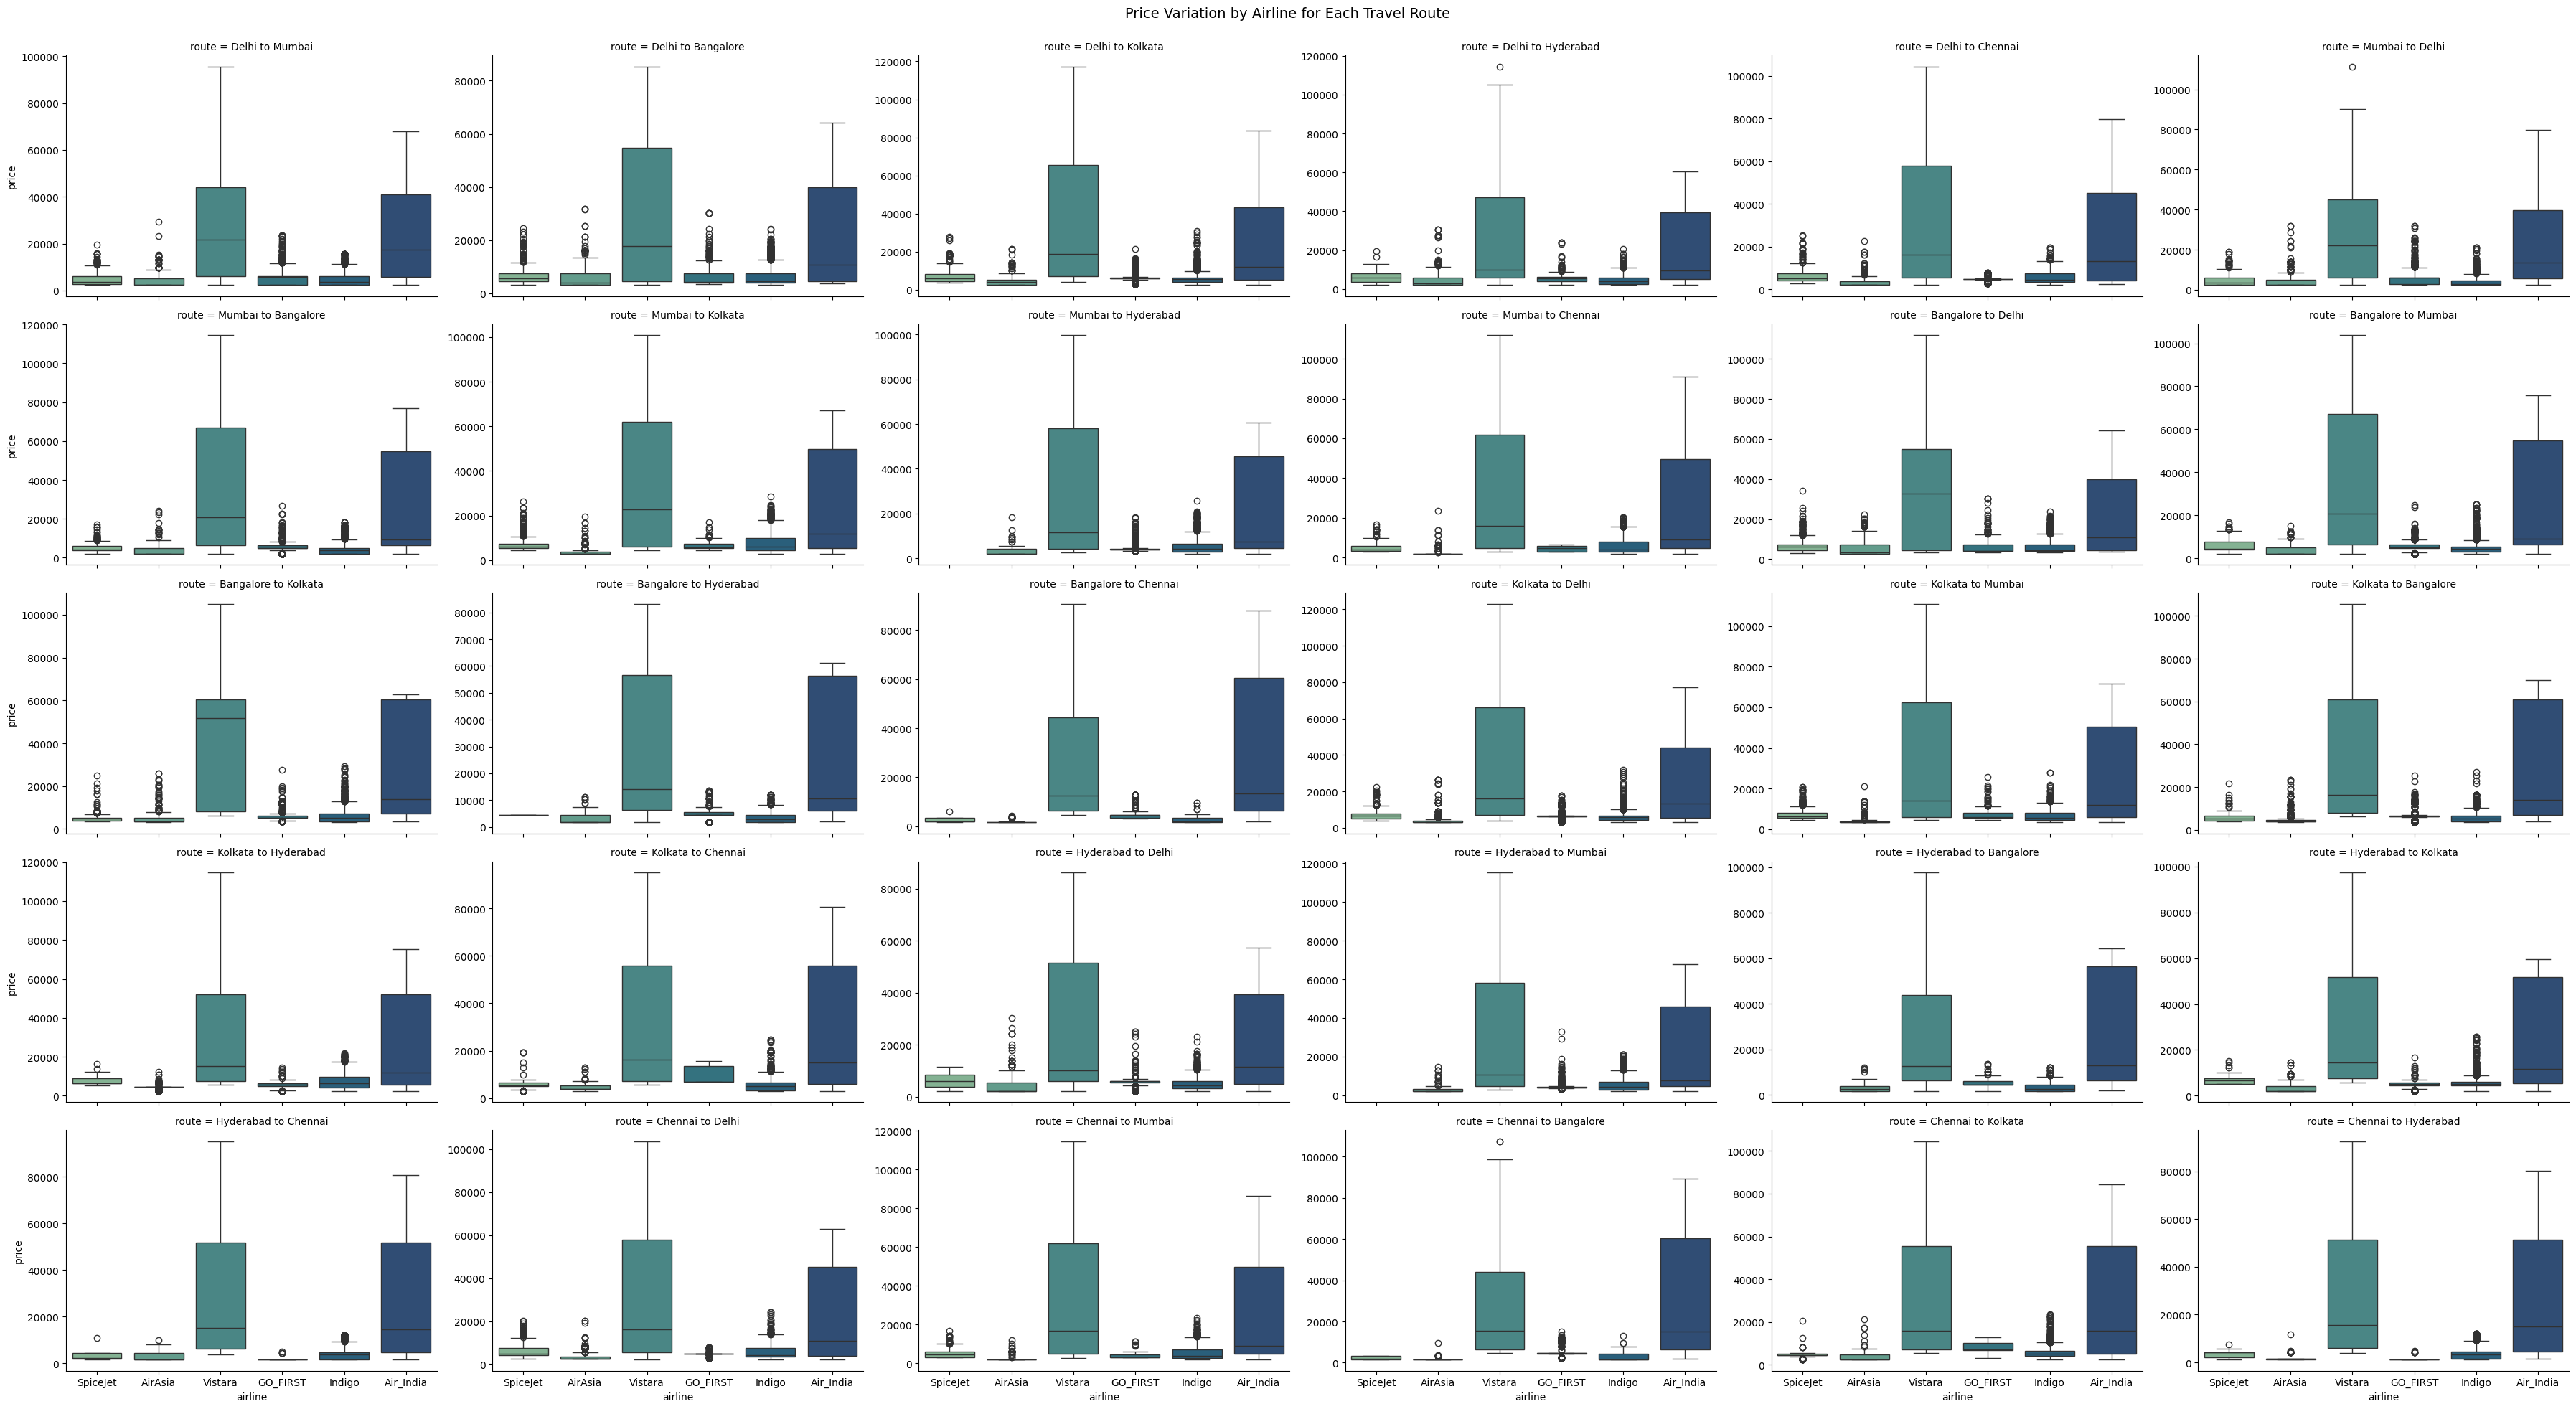

In [99]:
df['route'] = df['source_city'] + " to " + df['destination_city']
airline_order = df['airline'].unique()

blue_palette = sns.color_palette("crest", n_colors=len(airline_order))
color_dict = dict(zip(airline_order, blue_palette))

g = sns.FacetGrid(df, col="route", col_wrap=6, height=4, aspect=1.5, sharey=False)
g.map_dataframe(sns.boxplot, 'airline', 'price', hue='airline', palette=color_dict, order=airline_order, dodge=False)

for ax in g.axes.flatten():
    ax.set_xticks(ax.get_xticks()) 

g.fig.suptitle('Price Variation by Airline for Each Travel Route', fontsize=14)
g.fig.tight_layout(rect=[0, 0, 1, 0.98]) 
plt.show()

2. How is the price affected when tickets are bought in just 1 or 2 days before departure?

We expanded our focus beyond just the first and second days to include a larger range. The analysis reveals that significant price differences occur primarily when there is only one day left before departure.

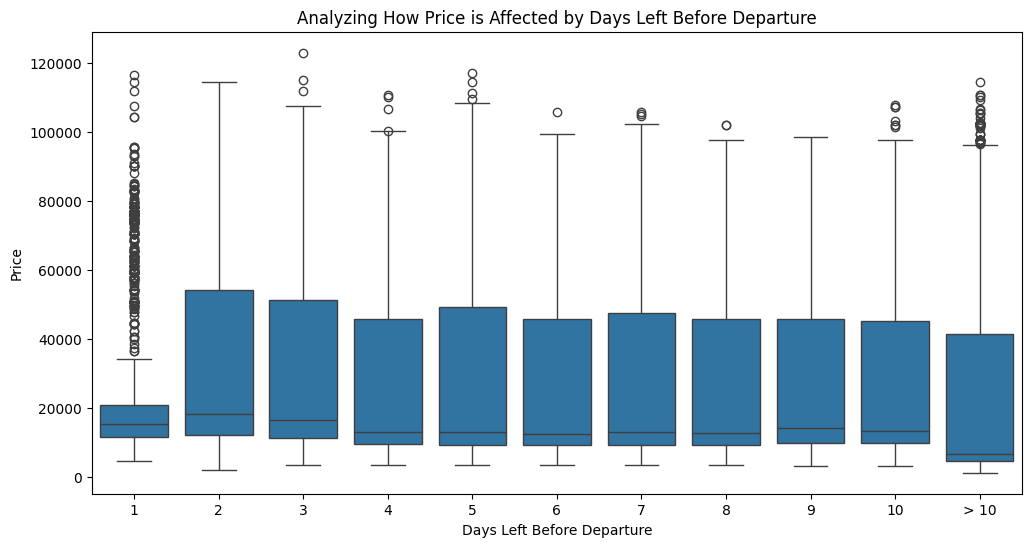

In [100]:
df_filtered = df[df['days_left'] <= 10]

# Add a category for days above 20
df_above_10 = df[df['days_left'] > 10].copy()
df_above_10['days_left'] = '> 10'

# Combine both DataFrames
df_combined = pd.concat([df_filtered, df_above_10])

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_combined, x='days_left', y='price')
plt.title('Analyzing How Price is Affected by Days Left Before Departure')
plt.xlabel('Days Left Before Departure')
plt.ylabel('Price')
plt.show()

In [101]:
departure_time_prices = df.groupby('departure_time')['price'].describe()
departure_time_prices/1000

,count,mean,std,min,25%,50%,75%,max
departure_time,,,,,,,,
Afternoon,47.794,18.179203,20.928840,1.105,4.593,6.663,27.9760,111.437
Early_Morning,66.790,20.370677,22.354875,1.105,4.757,7.212,42.4240,117.307
Evening,65.102,21.232362,23.168515,1.105,4.593,7.425,42.5210,116.562
Late_Night,1.306,9.295299,13.680516,2.050,3.393,4.499,6.4595,56.058
Morning,71.146,21.630760,22.968910,1.105,5.208,8.112,43.8650,123.071
Night,48.015,23.062147,23.617883,1.105,4.731,7.813,49.5530,115.211


In [102]:
departure_time_prices = df.groupby('arrival_time')['price'].describe()
departure_time_prices/1000

,count,mean,std,min,25%,50%,75%,max
arrival_time,,,,,,,,
Afternoon,38.139,18.494599,20.430013,1.105,4.542,6.714,32.923,115.211
Early_Morning,15.417,14.993140,18.898694,1.105,3.988,5.800,12.108,106.416
Evening,78.323,23.044372,23.494643,1.105,5.395,8.854,49.177,117.307
Late_Night,14.001,11.284906,16.399122,1.105,3.336,4.867,7.488,89.257
Morning,62.735,22.231076,23.266076,1.105,4.792,7.687,45.257,111.964
Night,91.538,21.586758,23.298012,1.105,4.979,7.584,44.280,123.071


3. Does ticket price change based on the departure time and arrival time?

For departure times, Late Night has a higher minimum price, but other statistics (25%, 50%, 75%, max, and mean) are significantly lower compared to other periods. Afternoon offers the second best pricing.

For arrival times, Late Night has the lowest prices, with Early Morning as the second best option. However, the minimum price is consistent across all arrival times. 

The options with lower prices also have the fewest entries.

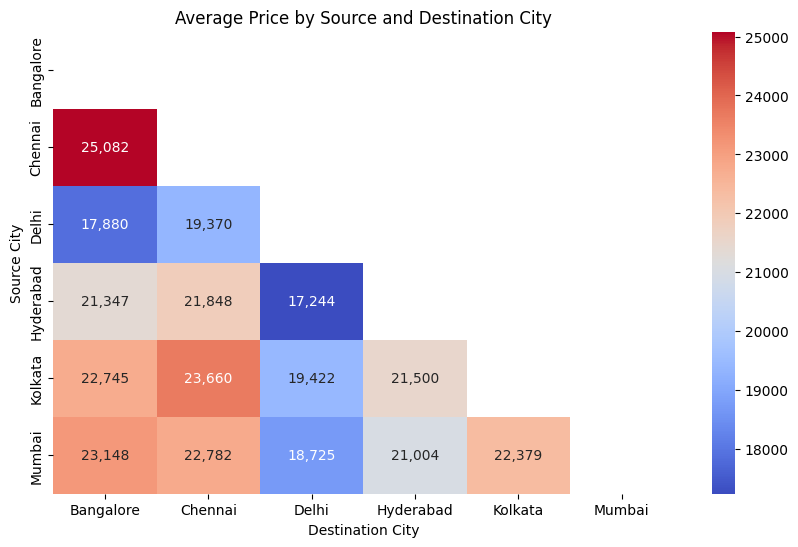

In [103]:
import numpy as np 
# Heatmap of average prices by source and destination city
pivot_table = df.pivot_table(values='price', index='source_city', columns='destination_city', aggfunc='mean')

# Mask the lower triangle of the heatmap
mask = np.triu(np.ones_like(pivot_table, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, mask=mask, cmap='coolwarm', annot=True, fmt=',.0f')
plt.title('Average Price by Source and Destination City')
plt.xlabel('Destination City')
plt.ylabel('Source City')
plt.show()


4. How the price changes with change in Source and Destination?

We’ve examined prices by source city, destination city, and airline for each travel route. Now, the heatmap of median prices reveals that the highest prices are from Chennai to Bangalore, while the lowest are from Hyderabad to Delhi.

In [108]:
summary_stats = df.groupby('class')['price'].describe()
summary_stats_formatted = summary_stats.map(lambda x: f'{x:,.0f}')
summary_stats_formatted


,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Business,"93,487","52,540","12,969","12,000","45,185","53,164","60,396","123,071"
Economy,"206,666","6,572","3,744","1,105","4,173","5,772","7,746","42,349"


5. How does the ticket price vary between Economy and Business class?

As expected, Business class has a significantly higher mean price ($52,540) compared to Economy class ($6,572), with greater variability in prices. Economy class, in contrast, offers lower prices and less variability.